In [2]:
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install mplleaflet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-py3-none-any.whl size=28582 sha256=f1bca9a865de2fc93b2f9583f9b356550747137f93a4d9fd22eacc8c7acee6b9
  Stored in directory: /root/.cache/pip/wheels/6b/f5/21/cdd12e476182b4b0b98326cdb9efa02ddbd5d87ca5de051c84
Successfully built mplleaflet


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import pandas as pd
from scipy.sparse import csr_matrix
import networkx as nx
from haversine import haversine
from itertools import permutations
from google.colab import drive
import mplleaflet
drive.mount('/gdrive')


Mounted at /gdrive


In [6]:
lines=pd.read_csv('/gdrive/My Drive/bus_comb_with_ratio.csv')  
lines=lines[['ori','des','spl','dist','ratio']]
lines.head()

ori        des       spl      dist     ratio
0  101000006  101000018  0.654352  0.654352  1.000000
1  101000006  101000020  0.849051  0.846469  1.003051
2  101000006  100000073  1.271861  1.258625  1.010516
3  101000006  100000075  1.653554  1.634146  1.011876
4  101000006  100000033  2.429508  1.403161  1.731453

In [7]:
bus_node=pd.read_csv('/gdrive/My Drive/bus_maw.csv')  
bus_node=bus_node[['NODE_ID','lat','lon']]
bus_node


NODE_ID         lat        lon
0    101000293  127.002722  37.560181
1    102000316  126.981814  37.552265
2    101000331  126.989311  37.559200
3    101000330  126.983697  37.555169
4    100000413  126.987550  37.571312
..         ...         ...        ...
383  100000127  127.000706  37.576058
384  100000123  127.002298  37.578124
385  100000124  127.002133  37.581107
386  100000023  126.977202  37.572405
387  100000102  126.997338  37.574533

[388 rows x 3 columns]

In [8]:
bus_col=bus_node.set_index('NODE_ID').transpose()
pos = bus_col.to_dict('list')

In [9]:
station=pd.unique(lines['ori'])

In [10]:
len(station)

388

In [11]:
G = nx.Graph()
G.add_nodes_from(station)
G.add_weighted_edges_from(lines[['ori','des','ratio']].to_numpy())

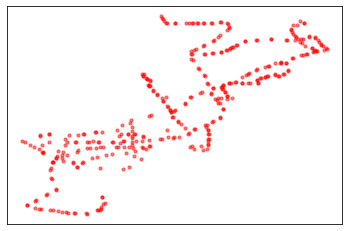

In [12]:
fig, ax = plt.subplots()

nx.draw_networkx_nodes(G,pos=pos,node_size=10,node_color='red',alpha=.5)
#nx.draw_networkx_edges(G,pos=pos,edge_color='gray', alpha=.002)
#nx.draw_networkx_labels(G,pos=pos, font_size=10)

plt.show()
mplleaflet.display(fig=fig)

In [13]:
bus_raw=pd.read_csv('/gdrive/My Drive/20220420.csv', encoding='cp949')  
bus_raw.columns = ['line_ID','line','num','NODE_ID','ARS-ID', 'station', 'lat','lon']
bus_raw.head()

line_ID  line  num    NODE_ID  ARS-ID     station         lat        lon
0  100100124  0017    1  102000271    3689     청암자이아파트  126.946517  37.534363
1  100100124  0017    2  102000204    3298  청암동강변삼성아파트  126.949304  37.533961
2  100100124  0017    3  102000227    3321       청심경로당  126.950449  37.533744
3  100100124  0017    4  102000210    3304    원효2동주민센터  126.950904  37.534278
4  100100124  0017    5  102000212    3306         산천동  126.953984  37.535420

In [14]:
for i in range(38181):
  if bus_raw['NODE_ID'][i] not in station:
        bus_raw=bus_raw.drop([i])


In [15]:
bus_raw=bus_raw.reset_index(drop=True)
bus_raw

line_ID  line  num    NODE_ID  ARS-ID             station         lat  \
0     100100124  0017   28  102000001    3001       한강대교북단.LG유플러스  126.963173   
1     100100124  0017   29  102000003    3003                신용산역  126.966144   
2     104000007   01A    1  101000006    2006           서울역버스환승센터  126.972773   
3     104000007   01A    2  101000018    2110         경찰청.동북아역사재단  126.969006   
4     104000007   01A    3  101000020    2113  서대문경찰서.농협은행.유관순활동터  126.967656   
...         ...   ...  ...        ...     ...                 ...         ...   
3106  100900005  종로08   21  100000123    1219           방송통신대.이화장  127.002298   
3107  100900005  종로08   22  100000124    1220          혜화역.마로니에공원  127.002133   
3108  100900003  종로09   13  100000023    1118             KT광화문지사  126.977202   
3109  100900007  종로11   14  100000023    1118             KT광화문지사  126.977202   
3110  100900009  종로12    3  100000102    1198                 원남동  126.997338   

            lon  
0     37.524101  
1     37.527280  
2     37.555475  
3     37.562993  
4     37.564848  
...         ...  
3106  37.578124  
3107  37.581107  
3108  37.572405  
3109  37.572405  
3110  37.574533  

[3111 rows x 8 columns]

In [16]:
ids=pd.unique(bus_raw['NODE_ID'])
lines=pd.unique(bus_raw['line_ID'])
G = nx.Graph()
G.add_nodes_from(ids)

In [17]:
for i in lines:
    line=bus_raw[bus_raw['line_ID']==i]
    line['des']=line['NODE_ID'].shift(-1)
    line['X']=line['lat'].shift(-1)
    line['Y']=line['lon'].shift(-1)
    line=line.dropna()
    line['des']=line['des'].astype('int')
    G.add_edges_from(line[['NODE_ID','des']].to_numpy())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

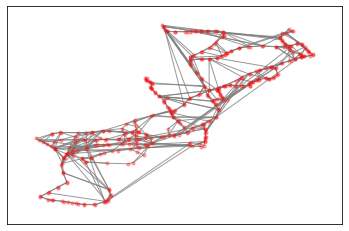

In [18]:
fig, ax = plt.subplots()

nx.draw_networkx_nodes(G,pos=pos,node_size=10,node_color='red',alpha=.3)
nx.draw_networkx_edges(G,pos=pos,edge_color='gray', alpha=.8)
#nx.draw_networkx_labels(G,pos=pos, font_size=10)

plt.show()
mplleaflet.display(fig=fig)

In [19]:
select=pd.read_csv('/gdrive/My Drive/final.csv', encoding='cp949')  
select=select[['ori','des','spl','dist','ratio']]
select.head()

ori        des        spl      dist     ratio
0  108000016  110000145  21.757325  5.438018  4.000966
1  110000145  108000016  21.757325  5.438018  4.000966
2  109900076  110000280  20.377542  5.087389  4.005501
3  110000280  109900076  20.377542  5.087389  4.005501
4  107000171  102000060  21.520117  5.371759  4.006158

In [20]:
gs = nx.Graph()
gs.add_nodes_from(station)
gs.add_weighted_edges_from(select[['ori','des','ratio']].to_numpy())

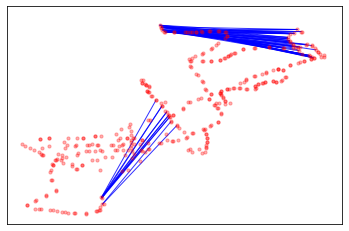

In [21]:
fig, ax = plt.subplots()

nx.draw_networkx_nodes(gs,pos=pos,node_size=10,node_color='red',alpha=.3)
nx.draw_networkx_edges(gs,pos=pos,edge_color='blue', alpha=.8)
#nx.draw_networkx_labels(G,pos=pos, font_size=10)

plt.show()
mplleaflet.display(fig=fig)

In [22]:
lines=pd.read_csv('/gdrive/My Drive/bus_comb_with_ratio.csv')  
lines=lines[['ori','des','spl','dist','ratio']]
lines.head()

ori        des       spl      dist     ratio
0  101000006  101000018  0.654352  0.654352  1.000000
1  101000006  101000020  0.849051  0.846469  1.003051
2  101000006  100000073  1.271861  1.258625  1.010516
3  101000006  100000075  1.653554  1.634146  1.011876
4  101000006  100000033  2.429508  1.403161  1.731453

In [23]:
walk=lines[lines.dist<0.3]
walk

ori        des        spl      dist        ratio
24      101000006  101000008   0.239499  0.239499     1.000000
25      101000006  101000004   0.491353  0.024514    20.044004
26      101000006  101000027   0.249822  0.249822     1.000000
141     101000006  101000007   1.027948  0.000593  1734.932667
388     101000018  101000020   0.194699  0.194699     1.000000
...           ...        ...        ...       ...          ...
149733  110000111  110000093  23.278877  0.236957    98.240947
149734  110000111  110000108  23.088465  0.298023    77.472036
149735  110000111  110000110  22.604666  0.188556   119.882865
150120  110000109  110000093  23.592976  0.203501   115.935304
150121  110000109  110000108  23.402565  0.016512  1417.298974

[1354 rows x 5 columns]

In [24]:
G.add_weighted_edges_from(walk[['ori','des','dist']].to_numpy())

In [25]:
comb=pd.DataFrame(list(permutations(station, 2)), columns=['ori','des'])

In [26]:
comb

ori        des
0       101000006  101000018
1       101000006  101000020
2       101000006  100000073
3       101000006  100000075
4       101000006  100000033
...           ...        ...
150151  110000109  110000289
150152  110000109  110000157
150153  110000109  110000156
150154  110000109  110000155
150155  110000109  110000111

[150156 rows x 2 columns]

In [27]:
def dist(ori, des):
    ori_corr=bus_raw[bus_raw['NODE_ID']==ori][['lat','lon']]
    des_corr=bus_raw[bus_raw['NODE_ID']==des][['lat','lon']]
    return  haversine(np.array(ori_corr)[0], np.array(des_corr)[0],unit = 'km')

def spl(ori,des):
    return nx.dijkstra_path_length(G,ori,des)

In [28]:
comb['spl']=comb.apply(lambda row: spl(row['ori'],row['des']), axis=1)

In [29]:
comb['dist']=comb.apply(lambda row: dist(row['ori'],row['des']), axis=1)

In [30]:
comb['ratio']=comb['spl']/comb['dist']

In [31]:
sel=comb[comb.ratio>3]

In [32]:
gs2 = nx.Graph()
gs2.add_nodes_from(station)
gs2.add_weighted_edges_from(sel[['ori','des','ratio']].to_numpy())

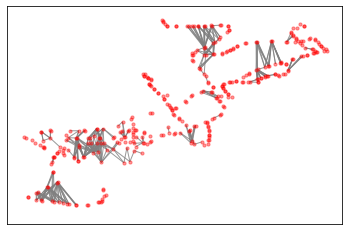

In [33]:
fig, ax = plt.subplots()

nx.draw_networkx_nodes(gs2,pos=pos,node_size=10,node_color='red',alpha=.4)
nx.draw_networkx_edges(gs2,pos=pos,edge_color='gray', alpha=.8)
#nx.draw_networkx_labels(G,pos=pos, font_size=10)

plt.show()
mplleaflet.display(fig=fig)

In [34]:
sel2=comb[comb.ratio>2]

In [35]:
sel2

ori        des       spl      dist     ratio
57      101000006  101000160  1.691911  0.832362  2.032661
107     101000006  102000012  1.024514  0.415177  2.467655
108     101000006  102000010  2.024514  0.786319  2.574671
109     101000006  102000008  3.024514  1.310820  2.307344
110     101000006  102000006  3.299804  1.583112  2.084378
...           ...        ...       ...       ...       ...
149763  110000111  110000147  1.965001  0.880806  2.230913
149849  110000109  110000277  1.556810  0.710163  2.192186
149944  110000109  110000276  1.552214  0.693395  2.238572
150127  110000109  110000148  2.291838  1.112939  2.059265
150150  110000109  110000147  2.279536  1.138488  2.002248

[4658 rows x 5 columns]

In [36]:
gs3 = nx.Graph()
gs3.add_nodes_from(station)
gs3.add_weighted_edges_from(sel[['ori','des','ratio']].to_numpy())

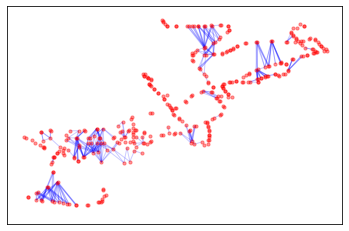

In [37]:
fig, ax = plt.subplots()

nx.draw_networkx_nodes(gs3,pos=pos,node_size=10,node_color='red',alpha=.4)
nx.draw_networkx_edges(gs3,pos=pos,edge_color='blue', alpha=0.2)
#nx.draw_networkx_labels(G,pos=pos, font_size=10)

plt.show()
mplleaflet.display(fig=fig)

In [38]:
sel2

ori        des       spl      dist     ratio
57      101000006  101000160  1.691911  0.832362  2.032661
107     101000006  102000012  1.024514  0.415177  2.467655
108     101000006  102000010  2.024514  0.786319  2.574671
109     101000006  102000008  3.024514  1.310820  2.307344
110     101000006  102000006  3.299804  1.583112  2.084378
...           ...        ...       ...       ...       ...
149763  110000111  110000147  1.965001  0.880806  2.230913
149849  110000109  110000277  1.556810  0.710163  2.192186
149944  110000109  110000276  1.552214  0.693395  2.238572
150127  110000109  110000148  2.291838  1.112939  2.059265
150150  110000109  110000147  2.279536  1.138488  2.002248

[4658 rows x 5 columns]

In [39]:
sel2['dist'].max()

2.49308770044698

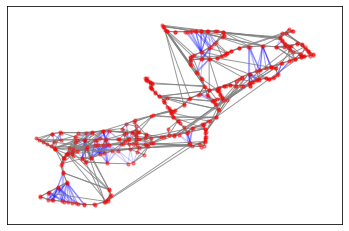

In [40]:
fig, ax = plt.subplots()

nx.draw_networkx_nodes(gs3,pos=pos,node_size=10,node_color='red',alpha=.2)
nx.draw_networkx_edges(gs3,pos=pos,edge_color='blue', alpha=0.2)
#nx.draw_networkx_labels(G,pos=pos, font_size=10)


nx.draw_networkx_nodes(G,pos=pos,node_size=10,node_color='red',alpha=.3)
nx.draw_networkx_edges(G,pos=pos,edge_color='gray', alpha=.8)
#nx.draw_networkx_labels(G,pos=pos, font_size=10)

plt.show()
mplleaflet.display(fig=fig)

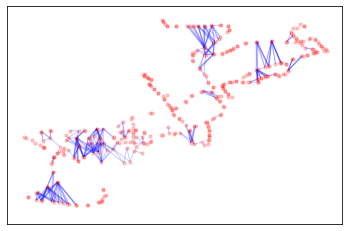

In [41]:
fig, ax = plt.subplots()

nx.draw_networkx_nodes(gs3,pos=pos,node_size=10,node_color='red',alpha=.2)
nx.draw_networkx_edges(gs3,pos=pos,edge_color='blue', alpha=0.2)
#nx.draw_networkx_labels(G,pos=pos, font_size=10)
plt.show()
mplleaflet.display(fig=fig)

In [42]:
sel2.to_csv('BP_sel.csv')

In [43]:
bus_raw.to_csv('BP_node_in_project.csv')

In [44]:
comb.to_csv('BP_comb.csv')

In [45]:
bus_node.to_csv('BP_bus_coor.csv')